In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('../Data/output_data/hallazgos_clean.xlsx')
df.head(10)

,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,fecha_desembolso,visita_analista_credito,categoria,hallazgo,tipo_hallazgo,riesgo,calificacion_cartera,relaciones_laborales,oficina,zona,regional,estado,year,tipo
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros,15069268,792642,36,2021-06-11,NaT,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,Si,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,2021-06-15,2021-06-08,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,No,Si,poblado,1,1,castigo,2022,afecta estabilidad
2,2,Jose Armando Agudelo Gomez,HZT,No_especificado,gallera_trebol,otros,1433360,178915,15,2022-10-02,2022-02-10,habilidad_empresarial,dudas sobre propiedad del negocio,fallas en la metodologia,1 - Alto,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad
3,3,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,2022-05-03,NaT,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,Si,Si,dosquebradas,12,4,modificado,2022,afecta estabilidad
4,4,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,otros,1055378,205648,6,2022-03-11,2022-03-05,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,Si,no_especificado,tulua,3,1,cancelada,2022,afecta estabilidad
5,5,Julitza Zarabanda Silva,HZT,No_especificado,cultivo_cafe,agricultura_ganaderia_y_afines,3033376,229915,24,2022-12-03,2022-03-12,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad
6,6,Harold Stevel Cuellar Izquierdo,HZT,No_especificado,cultivo_cafe,agricultura_ganaderia_y_afines,3033376,229908,24,2022-03-18,2022-03-18,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad
7,7,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,2022-07-23,2022-07-18,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,Si,Si,independencia,1,1,normal,2022,afecta estabilidad
8,8,Alba Nory Ospina Quintero,EQJ,Preferencial,mercancia,comercio_y_ventas_general,30933408,1358673,42,2022-04-28,NaT,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,No,Si,dosquebradas,12,4,normal,2022,afecta estabilidad
9,9,Carmelita Arias De Diaz,IKO,Preferencial,venta_de_catalogos,comercio_y_ventas_general,2100000,167706,24,2022-05-10,NaT,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,No,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad


In [3]:
df.columns  

Index(['Unnamed: 0', 'cliente', 'analista', 'tipo_credito', 'actividad',
       'actividad_v2', 'monto', 'cuota', 'plazo', 'fecha_desembolso',
       'visita_analista_credito', 'categoria', 'hallazgo', 'tipo_hallazgo',
       'riesgo', 'calificacion_cartera', 'relaciones_laborales', 'oficina',
       'zona', 'regional', 'estado', 'year', 'tipo'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3414 non-null   int64         
 1   cliente                  3413 non-null   object        
 2   analista                 3414 non-null   object        
 3   tipo_credito             3414 non-null   object        
 4   actividad                3414 non-null   object        
 5   actividad_v2             3414 non-null   object        
 6   monto                    3414 non-null   int64         
 7   cuota                    3414 non-null   int64         
 8   plazo                    3414 non-null   int64         
 9   fecha_desembolso         3411 non-null   datetime64[ns]
 10  visita_analista_credito  2524 non-null   datetime64[ns]
 11  categoria                3414 non-null   object        
 12  hallazgo                 3414 non-

In [5]:
df.isna().sum().sort_values(ascending=False)            

visita_analista_credito    890
fecha_desembolso             3
cliente                      1
Unnamed: 0                   0
tipo_hallazgo                0
year                         0
estado                       0
regional                     0
zona                         0
oficina                      0
relaciones_laborales         0
calificacion_cartera         0
riesgo                       0
categoria                    0
hallazgo                     0
plazo                        0
cuota                        0
monto                        0
actividad_v2                 0
actividad                    0
tipo_credito                 0
analista                     0
tipo                         0
dtype: int64

In [8]:
df.monto.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9]) 

count    3.414000e+03
mean     7.931928e+06
std      1.233972e+07
min      4.000000e+05
10%      1.132014e+06
20%      1.591942e+06
30%      2.234536e+06
40%      2.864240e+06
50%      3.736415e+06
60%      5.237300e+06
70%      6.581040e+06
80%      9.997782e+06
90%      1.969170e+07
max      1.300000e+08
Name: monto, dtype: float64

C:\Users\mateo\AppData\Local\Temp\ipykernel_1488\3306837576.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.monto, bins=50, color='red')


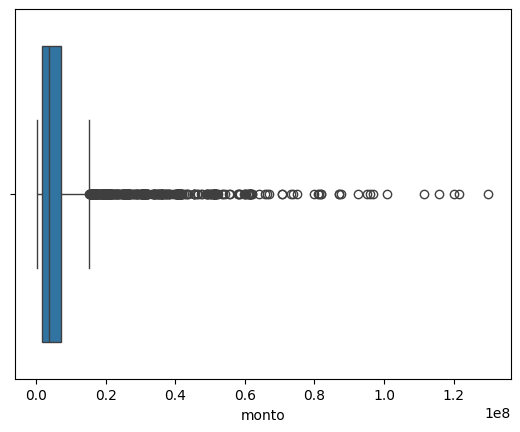

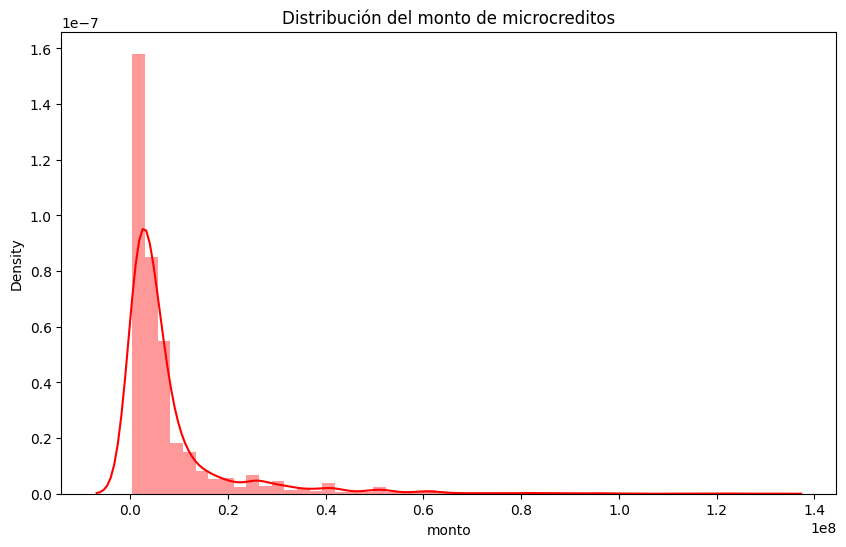

In [11]:
sns.boxplot(x=df.monto)

# visualize distribution

plt.figure(figsize=(10,6))
sns.distplot(df.monto, bins=50, color='red')
plt.title('Distribución del monto de microcreditos')
plt.show()

# contadores

# df['value'].value_counts()

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Calcular Q1, Q3 y el IQR
Q1 = np.percentile(df.monto, 25)  # Primer cuartil (25%)
Q3 = np.percentile(df.monto, 75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Calcular los límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df.monto[(df.monto < limite_inferior) | (df.monto > limite_superior)]
valores_atipicos_superior = df.monto[(df.monto > limite_superior)]

In [13]:
print(f'Limite superior para valores atipicos: {limite_superior}\n')
print(f'Numero de microcreditos consideramos como valores atipicos superiores: {valores_atipicos_superior.shape[0]}')
print(f'Porcentaje del total: {round(valores_atipicos_superior.shape[0]/df.shape[0]*100,3)}%')

Limite superior para valores atipicos: 15356331.5

Numero de microcreditos consideramos como valores atipicos superiores: 447
Porcentaje del total: 13.093%


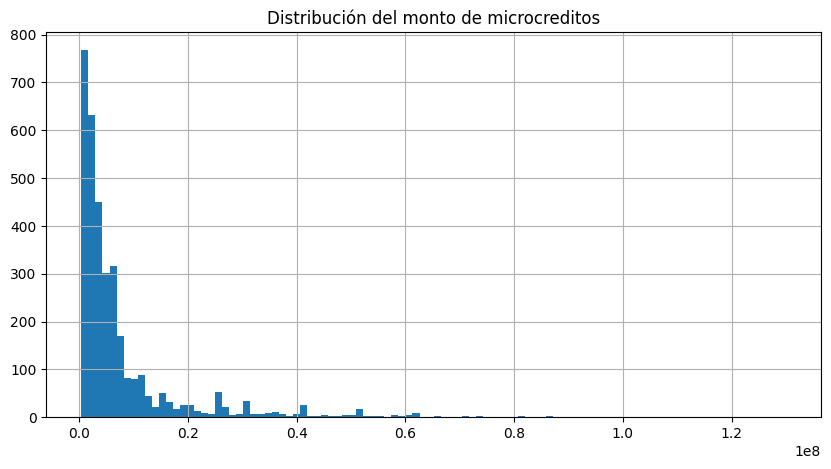

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df.monto,bins=100)
plt.title("Distribución del monto de microcreditos")
plt.grid()
plt.show()

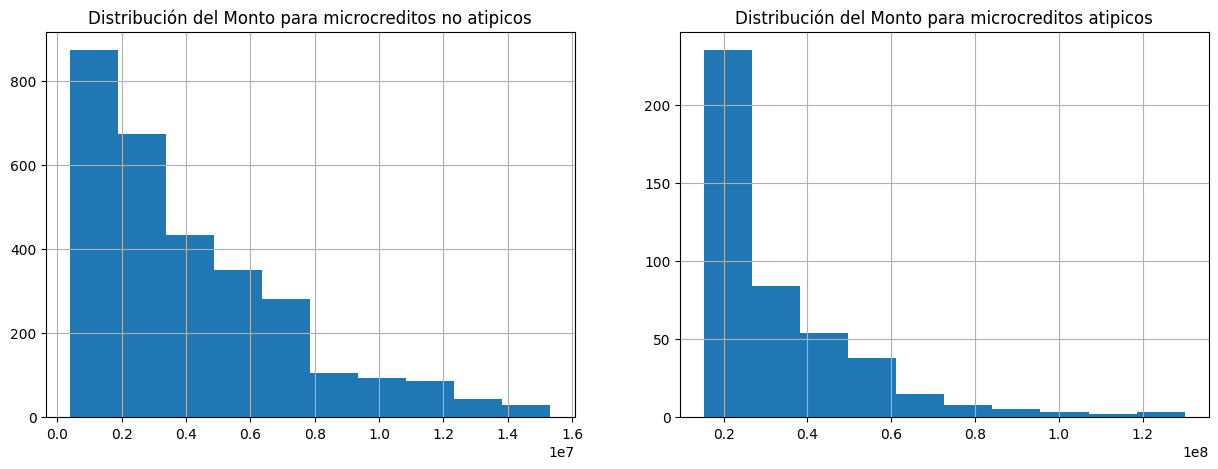

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df[df["monto"]<limite_superior].monto)
plt.title("Distribución del Monto para microcreditos no atipicos")
plt.grid()

plt.subplot(1,2,2)
plt.hist(df[df["monto"]>limite_superior].monto)
plt.title("Distribución del Monto para microcreditos atipicos")
plt.grid()


plt.show()

In [20]:
df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1520  400000  1079501.2  8.238271e+06  25124100.0  130000000
2023  1226  400000  1425926.5  7.070733e+06  13983196.0  100983196
2024   668  400000   600000.0  8.815436e+06  21000000.0  121469280

### Correlation analisys

In this part of the analisys, We want to make a correlation analisys, for do this We need to drop and transform data that can be helpull for us, so in the first part we make a little trial to prove what variables can be transformed related with his importance and his unique records, then We drop and encoded that variables that can be useful

In [14]:
print(df['categoria'].nunique())  
print(df['hallazgo'].nunique())  
print(df['tipo_hallazgo'].nunique())
print(df['riesgo'].nunique())
print(df['estado'].nunique())
print(df['tipo'].nunique())
print(df['calificacion_cartera'].nunique())
print(df['relaciones_laborales'].nunique())

16
82
6
5
7
5
3
3


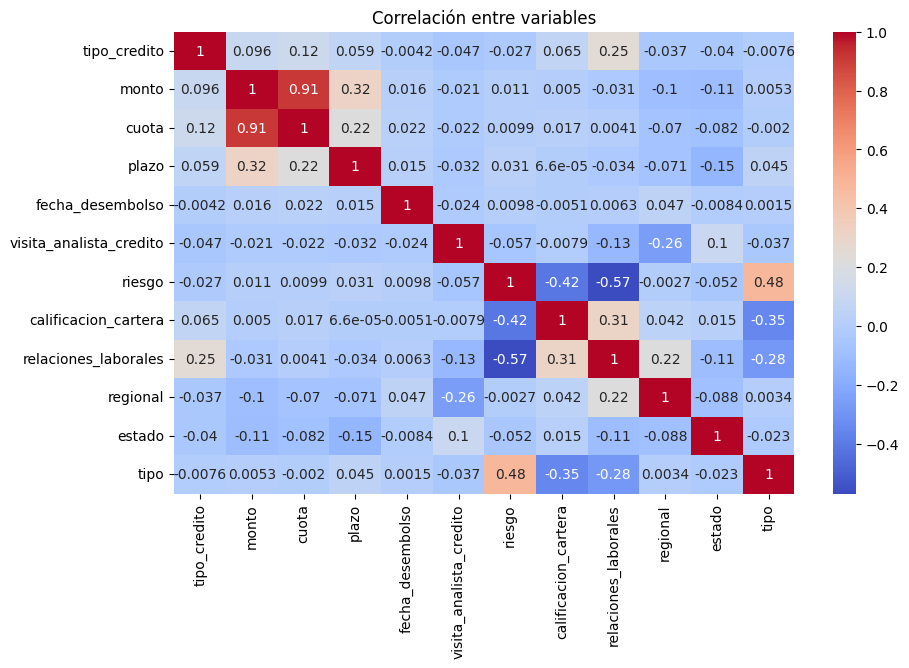

In [15]:
## correlation analysis 

le = LabelEncoder()
ho = OneHotEncoder(sparse_output=False)
df_corr = df
df_corr = df_corr.drop(columns=['cliente'])
df_corr = df_corr.drop(columns=['analista'])
df_corr['tipo_credito'] = le.fit_transform(df_corr['tipo_credito'])
df_corr = df_corr.drop(columns=['actividad'])
df_corr = df_corr.drop(columns=['actividad_v2'])
df_corr = df_corr.drop(columns=['categoria'])
df_corr = df_corr.drop(columns=['hallazgo'])
df_corr = df_corr.drop(columns=['tipo_hallazgo'])
df_corr['riesgo'] = ho.fit_transform(df_corr[['riesgo']])
df_corr['calificacion_cartera'] = ho.fit_transform(df_corr[['calificacion_cartera']])
df_corr['relaciones_laborales'] = ho.fit_transform(df_corr[['relaciones_laborales']])
df_corr['tipo'] = ho.fit_transform(df_corr[['tipo']])
df_corr = df_corr.drop(columns=['oficina'])
df_corr = df_corr.drop(columns=['zona'])
df_corr['estado'] = ho.fit_transform(df_corr[['estado']])
df_corr = df_corr.drop(columns=['year'])
df_corr = df_corr.drop(columns=['Unnamed: 0'])
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

We drop variables that no were relevants for our analisys like name, zone, office that are personal names that can't contribute to our analisys; year, that is only a record; category, findings, type of finding, because we don't know nothing about this variables before of the auditory.

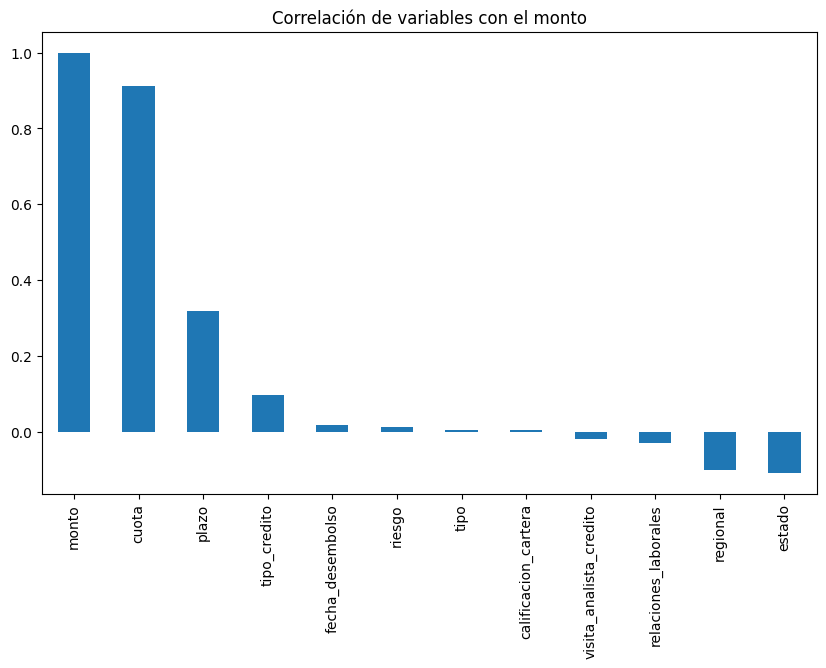

In [16]:
plt.figure(figsize=(10,6))
df_corr.corr()['monto'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de variables con el monto')
plt.show()

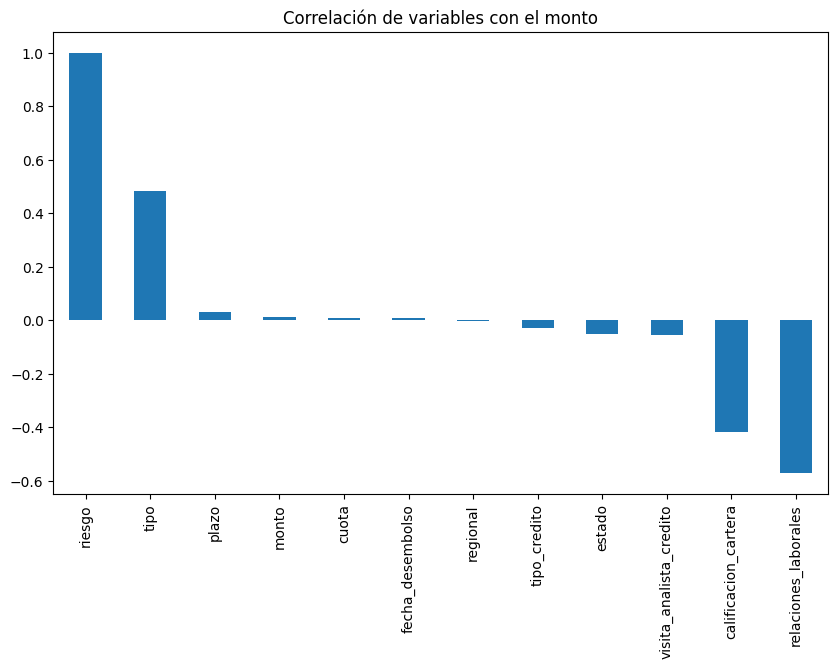

In [17]:
plt.figure(figsize=(10,6))
df_corr.corr()['riesgo'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de variables con el monto')
plt.show()